In [6]:
def decode_polyline(polyline, is3d=False):
        """Decodes a Polyline string into a GeoJSON geometry.
        :param polyline: An encoded polyline, only the geometry.
        :type polyline: string
        :param is3d: Specifies if geometry contains Z component.
        :type is3d: boolean
        :returns: GeoJSON Linestring geometry
        :rtype: dict
        """
        points = []
        index = lat = lng = z = 0

        while index < len(polyline):
            result = 1
            shift = 0
            while True:
                b = ord(polyline[index]) - 63 - 1
                index += 1
                result += b << shift
                shift += 5
                if b < 0x1F:
                    break
            lat += (~result >> 1) if (result & 1) != 0 else (result >> 1)

            result = 1
            shift = 0
            while True:
                b = ord(polyline[index]) - 63 - 1
                index += 1
                result += b << shift
                shift += 5
                if b < 0x1F:
                    break
            lng += ~(result >> 1) if (result & 1) != 0 else (result >> 1)

            if is3d:
                result = 1
                shift = 0
                while True:
                    b = ord(polyline[index]) - 63 - 1
                    index += 1
                    result += b << shift
                    shift += 5
                    if b < 0x1F:
                        break
                if (result & 1) != 0:
                    z += ~(result >> 1)
                else:
                    z += result >> 1

                points.append(
                    [
                        round(lng * 1e-5, 6),
                        round(lat * 1e-5, 6),
                        round(z * 1e-2, 1),
                    ]
                )

            else:
                points.append([round(lng * 1e-5, 6), round(lat * 1e-5, 6)])

        geojson = {"type": "LineString", "coordinates": points}

        return geojson

In [6]:
decode_polyline("{}plHos}s@`JrRoCxK|`pA~ws@hpaEbolBrvvApjp@")

{'type': 'LineString',
 'coordinates': [[8.67656, 49.40782],
  [8.67342, 49.40605],
  [8.67137, 49.40677],
  [8.40113, 48.99174],
  [7.84047, 47.99569],
  [7.58774, 47.54647]]}

In [7]:
import json
with open("/home/clemens/Downloads/test_weird.json") as inf:
    response = json.load(inf)

In [8]:
import pandas as pd

df = pd.DataFrame.from_dict(response)

ValueError: All arrays must be of the same length

In [20]:
response["features"][0]["properties"]["segments"][0].keys()

dict_keys(['distance', 'duration', 'steps'])

In [43]:
import requests

body = {"coordinates":[[ 9.189705511661828,
          48.80269371644283],[8.630738190785365,
            49.4186999279311]]}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Content-Type': 'application/json; charset=utf-8'
}
call = requests.post('http://129.206.6.215:9001/ors/v2/directions/public-transport/geojson', json=body, headers=headers)

print(call.status_code, call.reason)
print(call.text)

200 
{"type":"FeatureCollection","metadata":{"attribution":"openrouteservice.org, OpenStreetMap contributors","service":"routing","timestamp":1686133835783,"query":{"coordinates":[[9.189705511661828,48.80269371644283],[8.630738190785365,49.4186999279311]],"profile":"public-transport","ptRequest":true,"format":"geojson"},"engine":{"version":"7.0.1","build_date":"2023-05-30T14:58:05Z","graph_date":"0000-00-00T00:00:00Z"}},"bbox":[8.462642,48.78311,9.217514,49.418696],"features":[{"bbox":[8.630718,48.78311,9.217514,49.418696],"type":"Feature","properties":{"transfers":4,"fare":0,"segments":[{"distance":91069.0,"duration":6573.8,"steps":[{"distance":23.5,"duration":16.9,"type":11,"instruction":"Head south on Nordbahnhofstraße","name":"Nordbahnhofstraße","way_points":[0,2]},{"distance":17.0,"duration":12.2,"type":0,"instruction":"Turn left","name":"-","way_points":[2,3]},{"distance":28.9,"duration":20.8,"type":0,"instruction":"Turn left onto Nordbahnhofstraße","name":"Nordbahnhofstraße","wa

In [22]:
call.json()

{'type': 'FeatureCollection',
 'metadata': {'attribution': 'openrouteservice.org, OpenStreetMap contributors',
  'service': 'routing',
  'timestamp': 1686131794850,
  'query': {'coordinates': [[8.681495, 49.41461],
    [8.686507, 49.41943],
    [8.687872, 49.420318]],
   'profile': 'public-transport',
   'ptRequest': True,
   'format': 'geojson'},
  'engine': {'version': '7.0.1',
   'build_date': '2023-05-30T14:58:05Z',
   'graph_date': '0000-00-00T00:00:00Z'}},
 'bbox': [8.681423, 49.414599, 8.687872, 49.420319],
 'features': [{'bbox': [8.681423, 49.414599, 8.687872, 49.420319],
   'type': 'Feature',
   'properties': {'transfers': 0,
    'fare': 0,
    'segments': [{'distance': 849.7,
      'duration': 611.8,
      'steps': [{'distance': 1.9,
        'duration': 1.4,
        'type': 11,
        'instruction': 'Head west on Gerhart-Hauptmann-Straße',
        'name': 'Gerhart-Hauptmann-Straße',
        'way_points': [0, 1]},
       {'distance': 409.5,
        'duration': 294.8,
        

In [24]:
import geopandas as gpd

In [45]:
with open("test.geojson","w+") as outf:
    json.dump(call.json(),outf)
df = gpd.read_file("test.geojson",driver="GeoJSON")

In [50]:
df.explore()

In [52]:
df.head()

,transfers,fare,segments,legs,summary,geometry
0,4,0,"[ { ""distance"": 91069.0, ""duration"": 6573.8000...","[ { ""type"": ""walk"", ""departure_location"": ""Wal...","{'distance': 91069.0, 'duration': 6573.8}","LINESTRING (9.18965 48.80269, 9.18967 48.80249..."
1,3,0,"[ { ""distance"": 104704.2, ""duration"": 10233.79...","[ { ""type"": ""walk"", ""departure_location"": ""Wal...","{'distance': 104704.2, 'duration': 10233.8}","LINESTRING (9.18965 48.80269, 9.18965 48.80269..."
2,2,0,"[ { ""distance"": 127335.3, ""duration"": 12573.79...","[ { ""type"": ""walk"", ""departure_location"": ""Wal...","{'distance': 127335.3, 'duration': 12573.8}","LINESTRING (9.18965 48.80269, 9.18965 48.80269..."


In [101]:
data = []
from shapely.geometry import shape
for id, row in enumerate(df.iterrows()):
    for segment in json.loads(row[1]["legs"]):
        print(segment)
        data_point = {
            "route_id":id,
            "type":segment["type"],
            "geometry":shape(decode_polyline(segment["geometry"]))
        }
        try:
            data_point["name"]=segment["route_long_name"]
            data_point["head"]=segment["trip_headsign"]
        except:
            data_point["name"]=segment["type"]
            pass
        data.append(data_point)
    #print(segment.keys())

{'type': 'walk', 'departure_location': 'Walk', 'route_type': -1, 'distance': 74.6, 'duration': 53.7, 'departure': '2023-06-07T10:42:06.262Z', 'arrival': '2023-06-07T10:43:00Z', 'geometry': 'ywzhHizaw@f@C@AAm@C?o@D?L', 'instructions': [{'distance': 23.5, 'duration': 16.9, 'type': 11, 'instruction': 'Head south on Nordbahnhofstraße', 'name': 'Nordbahnhofstraße', 'way_points': [0, 2]}, {'distance': 17.0, 'duration': 12.2, 'type': 0, 'instruction': 'Turn left', 'name': '-', 'way_points': [2, 3]}, {'distance': 28.9, 'duration': 20.8, 'type': 0, 'instruction': 'Turn left onto Nordbahnhofstraße', 'name': 'Nordbahnhofstraße', 'way_points': [3, 5]}, {'distance': 5.3, 'duration': 3.8, 'type': 0, 'instruction': 'Turn left', 'name': '-', 'way_points': [5, 6]}, {'distance': 0.0, 'duration': 0.0, 'type': 10, 'instruction': 'Arrive at your destination, on the right', 'name': '-', 'way_points': [6, 6]}]}
{'type': 'pt', 'departure_location': 'Stuttgart Nordbahnhof', 'trip_headsign': 'U12', 'route_long_

In [88]:
data

[{'route_id': 0,
  'type': 'walk',
  'geometry': <LINESTRING (9.19 48.803, 9.19 48.802, 9.19 48.802, 9.19 48.802, 9.19 48.803...>},
 {'route_id': 0,
  'type': 'pt',
  'geometry': <LINESTRING (9.19 48.803, 9.19 48.798, 9.19 48.794, 9.186 48.79, 9.181 48.783)>},
 {'route_id': 0,
  'type': 'walk',
  'geometry': <LINESTRING (9.181 48.783, 9.181 48.783, 9.181 48.783, 9.18 48.783, 9.18 48....>},
 {'route_id': 0,
  'type': 'pt',
  'geometry': <LINESTRING (9.18 48.783, 9.218 48.801)>},
 {'route_id': 0,
  'type': 'pt',
  'geometry': <LINESTRING (9.218 48.801, 9.183 48.785)>},
 {'route_id': 0,
  'type': 'pt',
  'geometry': <LINESTRING (9.183 48.785, 8.675 49.404)>},
 {'route_id': 0,
  'type': 'walk',
  'geometry': <LINESTRING (8.675 49.404, 8.675 49.404, 8.675 49.404)>},
 {'route_id': 0,
  'type': 'pt',
  'geometry': <LINESTRING (8.675 49.404, 8.642 49.412)>},
 {'route_id': 0,
  'type': 'walk',
  'geometry': <LINESTRING (8.641 49.412, 8.641 49.412, 8.641 49.412, 8.641 49.412, 8.641 4...>},
 {'ro

<Axes: >

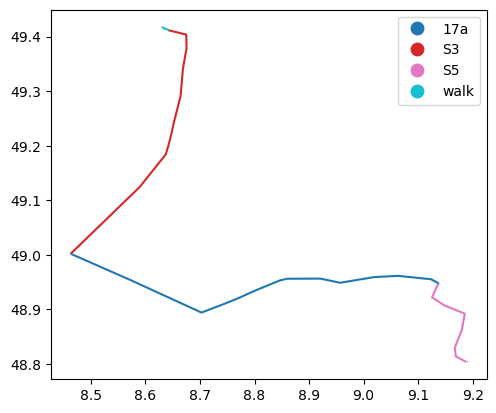

In [102]:
df_cleaned = gpd.GeoDataFrame.from_dict(data).set_geometry("geometry")
df_cleaned.loc[df_cleaned["route_id"]==2].plot(column="name",legend=True)

In [97]:
df_cleaned

,route_id,type,geometry,name,head
0,0,walk,"LINESTRING (9.18965 48.80269, 9.18967 48.80249...",NaN,NaN
1,0,pt,"LINESTRING (9.18973 48.80308, 9.19018 48.79792...",U12,U12
2,0,walk,"LINESTRING (9.18065 48.78330, 9.18069 48.78335...",NaN,NaN
3,0,pt,"LINESTRING (9.18034 48.78337, 9.21751 48.80139)",S1,S1
4,0,pt,"LINESTRING (9.21751 48.80139, 9.18322 48.78475)",MEX12,MEX12
5,0,pt,"LINESTRING (9.18322 48.78475, 8.67514 49.40384)",Intercity,Intercity
6,0,walk,"LINESTRING (8.67537 49.40377, 8.67541 49.40381...",NaN,NaN
7,0,pt,"LINESTRING (8.67526 49.40395, 8.64153 49.41196)",S1,S1
8,0,walk,"LINESTRING (8.64105 49.41215, 8.64107 49.41217...",NaN,NaN
9,1,walk,"LINESTRING (9.18965 48.80269, 9.18965 48.80269...",NaN,NaN


In [14]:
from itertools import product
from qgis.core import (QgsPoint,
                       QgsPointXY,
                       QgsGeometry,
                       QgsFeature,
                       QgsFields,
                       QgsField,
                       QgsVectorLayer,
                       QgsProject)
from typing import List

from PyQt5.QtCore import QVariant

from ORStools.utils import convert


def get_output_feature_directions(response, profile, preference, options=None, from_value=None, to_value=None):
    """
    Build output feature based on response attributes for directions endpoint.

    :param response: API response object
    :type response: dict

    :param profile: Transportation mode being used
    :type profile: str

    :param preference: Cost being used, shortest, fastest or recommended.
    :type preference: str

    :param options: Avoidables being used.
    :type options: str

    :param from_value: value of 'FROM_ID' field
    :type from_value: any

    :param to_value: value of 'TO_ID' field
    :type to_value: any

    :returns: Output feature with attributes and geometry set.
    :rtype: QgsFeature
    """

    if profile == "public-transport":

        feats = []
        for segment in response["features"][0]["properties"]["legs"]:
            feat = QgsFeature()
            coordinates = decode_polyline(segment["geometry"])["coordinates"]
            print(coordinates)
            qgis_coords = [QgsPoint(x, y) for x, y in coordinates]
            feat.setGeometry(QgsGeometry.fromPolyline(qgis_coords))
            feat.setAttributes([f"{segment['distance'] / 1000:.3f}",
                                f"{segment['duration'] / 3600:.3f}",
                                segment['departure'],
                                segment['arrival'],
                                segment['type']
                                ])
            if segment['type'] == 'pt':
                feat.setAttributes([segment['route_long_name']])
            

            feats.append(feat)

        """print(segment)
            data_point = {
                "route_id": id,
                "type": segment["type"],
                "geometry": shape(decode_polyline(segment["geometry"]))
            }
            try:
                data_point["name"] = segment["route_long_name"]
                data_point["head"] = segment["trip_headsign"]
            except:
                data_point["name"] = segment["type"]
                pass
            data.append(data_point)"""
    else:
        response_mini = response['features'][0]
        feats = QgsFeature()
        coordinates = response_mini['geometry']['coordinates']
        distance = response_mini['properties']['summary']['distance']
        duration = response_mini['properties']['summary']['duration']
        qgis_coords = [QgsPoint(x, y, z) for x, y, z in coordinates]
        feats.setGeometry(QgsGeometry.fromPolyline(qgis_coords))
        feats.setAttributes([f"{distance / 1000:.3f}",
                            f"{duration / 3600:.3f}",
                            profile,
                            preference,
                            str(options),
                            from_value,
                            to_value
                            ])

    return feats
feats = get_output_feature_directions(call.json(), "public-transport", {}, options=None, from_value=None, to_value=None)

[[9.18965, 48.80269], [9.18967, 48.80249], [9.18968, 48.80248], [9.18991, 48.80249], [9.18991, 48.80251], [9.18988, 48.80275], [9.18981, 48.80275]]
[[9.18973, 48.80308], [9.19018, 48.79792], [9.18981, 48.7935], [9.18566, 48.79048], [9.18107, 48.78311]]
[[9.18065, 48.7833], [9.18069, 48.78335], [9.18051, 48.78343], [9.18038, 48.78348], [9.1803, 48.7834], [9.18027, 48.78336], [9.18024, 48.78333], [9.18037, 48.78328], [9.18055, 48.78321]]
[[9.18034, 48.78337], [9.21751, 48.80139]]
[[9.21751, 48.80139], [9.18322, 48.78475]]
[[9.18322, 48.78475], [8.95687, 48.94875], [8.47003, 49.47923]]
[[8.47001, 49.47921], [8.46997, 49.47918], [8.47007, 49.47913], [8.47011, 49.47911], [8.4701, 49.4791], [8.47008, 49.47909], [8.46996, 49.47897], [8.46991, 49.479], [8.46981, 49.47904], [8.46984, 49.47907]]
[[8.46982, 49.47908], [8.51574, 49.46], [8.53838, 49.45128], [8.57251, 49.43806], [8.64159, 49.4119]]
[[8.64156, 49.41188], [8.64102, 49.4121], [8.641, 49.41207], [8.64104, 49.41205], [8.64106, 49.41205]

In [9]:
import requests

body = {"coordinates":[[ 9.189705511661828,
          48.80269371644283],[8.630738190785365,
            49.4186999279311]]}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Content-Type': 'application/json; charset=utf-8'
}
call = requests.post('http://129.206.6.215:9001/ors/v2/directions/public-transport/geojson', json=body, headers=headers)

print(call.status_code, call.reason)
print(call.text)

200 
{"type":"FeatureCollection","metadata":{"attribution":"openrouteservice.org, OpenStreetMap contributors","service":"routing","timestamp":1686144939902,"query":{"coordinates":[[9.189705511661828,48.80269371644283],[8.630738190785365,49.4186999279311]],"profile":"public-transport","ptRequest":true,"format":"geojson"},"engine":{"version":"7.0.1","build_date":"2023-05-30T14:58:05Z","graph_date":"0000-00-00T00:00:00Z"}},"bbox":[8.469813,48.78311,9.228842,49.47923],"features":[{"bbox":[8.469813,48.78311,9.217514,49.47923],"type":"Feature","properties":{"transfers":6,"fare":0,"segments":[{"distance":118913.7,"duration":7086.7,"steps":[{"distance":23.5,"duration":16.9,"type":11,"instruction":"Head south on Nordbahnhofstraße","name":"Nordbahnhofstraße","way_points":[0,2]},{"distance":17.0,"duration":12.2,"type":0,"instruction":"Turn left","name":"-","way_points":[2,3]},{"distance":28.9,"duration":20.8,"type":0,"instruction":"Turn left onto Nordbahnhofstraße","name":"Nordbahnhofstraße","way

In [10]:
feats = get_output_feature_directions(call.json(), "public-transport", {}, options=None, from_value=None, to_value=None)

{'type': 'walk', 'departure_location': 'Walk', 'route_type': -1, 'distance': 74.6, 'duration': 53.7, 'departure': '2023-06-07T13:42:06.262Z', 'arrival': '2023-06-07T13:43:00Z', 'geometry': 'ywzhHizaw@f@C@AAm@C?o@D?L', 'instructions': [{'distance': 23.5, 'duration': 16.9, 'type': 11, 'instruction': 'Head south on Nordbahnhofstraße', 'name': 'Nordbahnhofstraße', 'way_points': [0, 2]}, {'distance': 17.0, 'duration': 12.2, 'type': 0, 'instruction': 'Turn left', 'name': '-', 'way_points': [2, 3]}, {'distance': 28.9, 'duration': 20.8, 'type': 0, 'instruction': 'Turn left onto Nordbahnhofstraße', 'name': 'Nordbahnhofstraße', 'way_points': [3, 5]}, {'distance': 5.3, 'duration': 3.8, 'type': 0, 'instruction': 'Turn left', 'name': '-', 'way_points': [5, 6]}, {'distance': 0.0, 'duration': 0.0, 'type': 10, 'instruction': 'Arrive at your destination, on the right', 'name': '-', 'way_points': [6, 6]}]}


TypeError: string indices must be integers